# Figures D1 - D4: Example Landsat and Sentinel-2 imagery

For this notebook, it is necessary to download the full dataset with the images. 

In [ ]:
import json
import urllib
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from matplotlib.gridspec import GridSpec
from PIL import Image

from pycontrails.datalib import sentinel


In [2]:
DATASET_LOCATION = "../../data/collocations"

df = pd.read_csv('../../data/landsat_sentinel_collocations_20260212.csv', comment='#')

In [3]:
forest = "intersects_sentinel/2021/2021010215342508_L1C_T49MFV_A019992_20210103T025251"
icy = "intersects_sentinel/2020/2020021210044807_L1C_T27WWP_A024245_20200212T131250"
ocean = "intersects_sentinel/2021/2021041708580902_L1C_T20UQU_A030395_20210417T145724"
urban = "intersects_sentinel/2021/2021040808284907_L1C_T18TUN_A030267_20210408T160051"

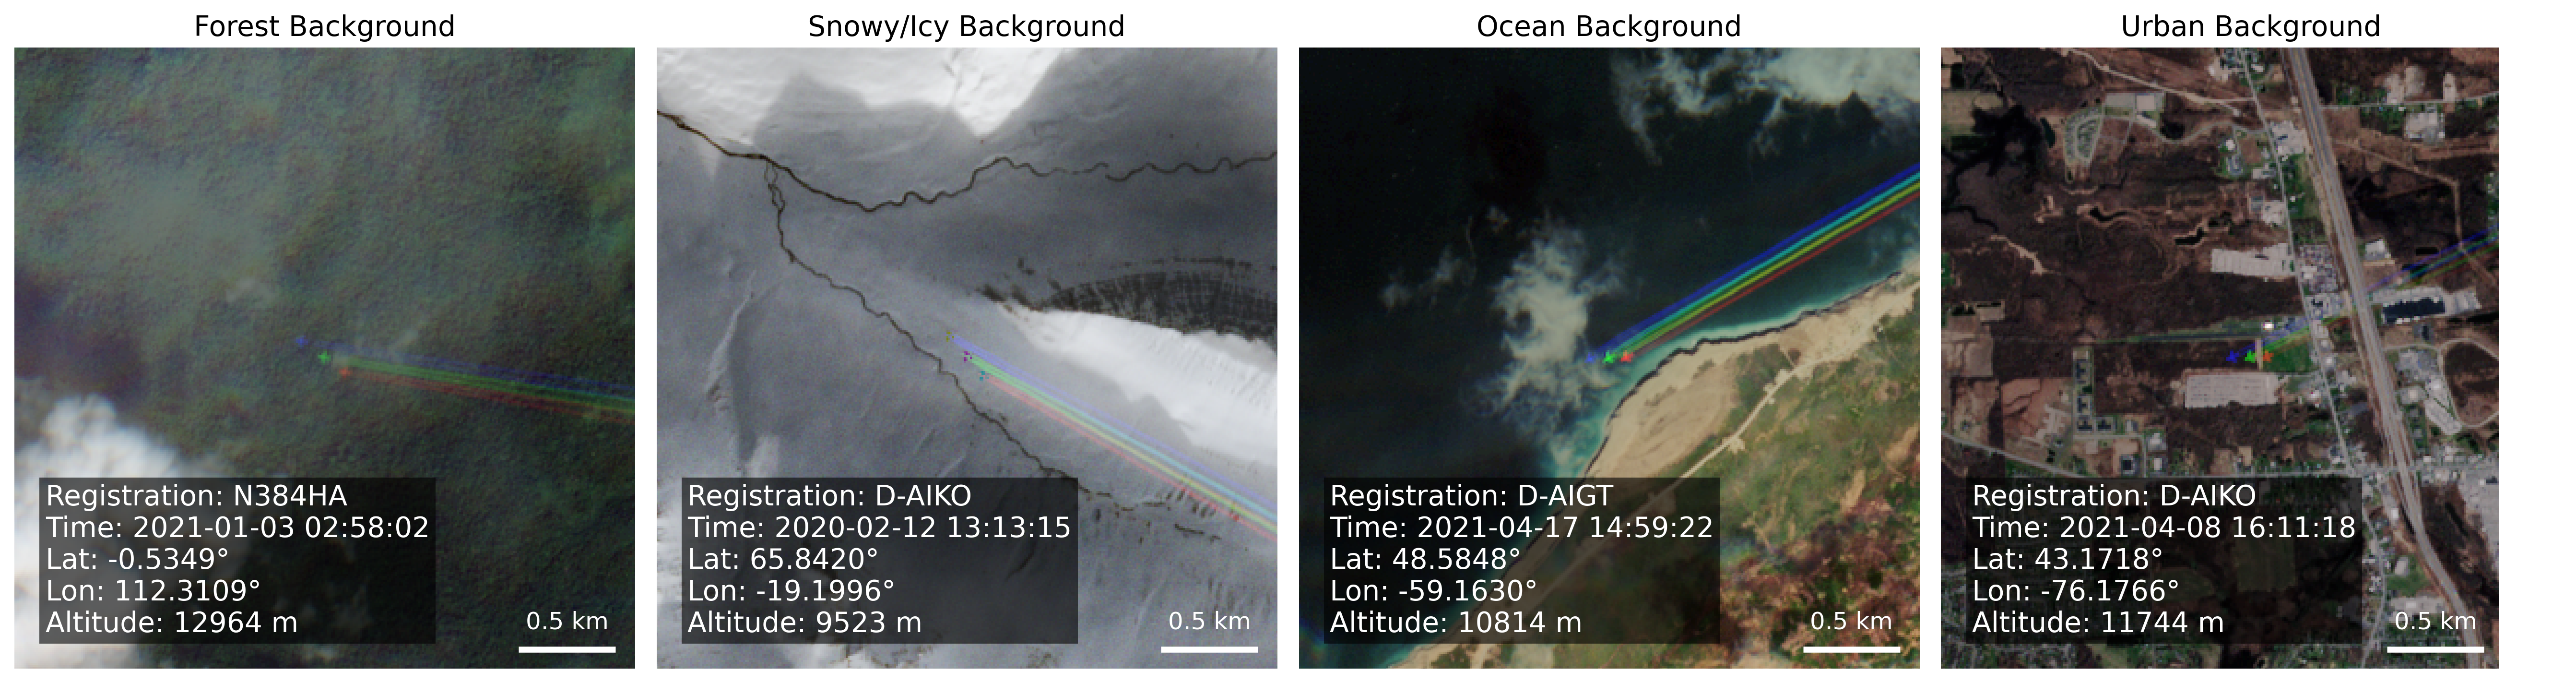

In [4]:

fig, axes = plt.subplots(1, 4, figsize=(18, 5), dpi=300)
axes = axes.flatten()

titles = ["Forest Background", "Snowy/Icy Background", "Ocean Background", "Urban Background"]

for idx, case in enumerate([forest, icy, ocean, urban]):
    intersect_directory = Path(DATASET_LOCATION) / case

    with open(f"{intersect_directory}/metadata.json") as f:
        metadata = json.load(f)

    label = metadata["annotations"]
    x, y = label["x"], label["y"]

    granule_id = metadata["satellite_data"]["granule_id"]

    df_row = df.loc[df["scene_id"] == granule_id].iloc[0]

    # IAGOS info
    registration = metadata["iagos_data"]["registration"]
    lat = df_row["latitude"]
    lon = df_row["longitude"]
    altitude = df_row["altitude"]
    sensing_time = metadata["satellite_data"]["sensing_time"]

    rgb_path = f"{intersect_directory}/imagery/rgb_subset.png"

    extent = metadata["satellite_data"]["imagery"]["extent_subset"]  # [xmin, xmax, ymin, ymax]

    rgb_img = mpimg.imread(rgb_path)

    axes[idx].imshow(rgb_img, extent=extent, origin="upper")
    axes[idx].set_title(titles[idx], fontsize=14)
    axes[idx].axis("off")

    window = 1600  # meters
    axes[idx].set_xlim(x - window, x + window)
    axes[idx].set_ylim(y - window, y + window)

    text = (
        f"Registration: {registration}\n"
        f"Time: {sensing_time[:19]}\n"
        f"Lat: {lat:.4f}°\n"
        f"Lon: {lon:.4f}°\n"
        f"Altitude: {round(altitude)} m"
    )

    axes[idx].text(
        0.05, 0.05,
        text,
        transform=axes[idx].transAxes,
        fontsize=14,
        va="bottom",
        ha="left",
        color="white",
        bbox=dict(facecolor="black", alpha=0.6, edgecolor="none", pad=3)
    )

    # Scale bar
    scalebar_length = 500  # meters
    if idx == 3:
        margin = 100  # meters from edge

        bar_x = x + window - scalebar_length - 4 * margin
        bar_y = y - window + margin

    else:
        margin = 100  # meters from edge

        bar_x = x + window - scalebar_length - margin
        bar_y = y - window + margin

    # Draw scale bar line
    axes[idx].plot(
        [bar_x, bar_x + scalebar_length],
        [bar_y, bar_y],
        color="white",
        linewidth=3,
        solid_capstyle="butt",
    )

    # Add scale bar label
    axes[idx].text(
        bar_x + scalebar_length / 2,
        bar_y + 80,
        f"{scalebar_length / 1000} km",
        color="white",
        ha="center",
        va="bottom",
        fontsize=12,
        # bbox=dict(facecolor="black", alpha=0.4, edgecolor="none", pad=1.5),
    )

plt.tight_layout()
plt.savefig("figures/figD1.png", dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

---
## Figure D2

/var/folders/zt/t69lkpcs0mz7l5vz3jt_48ldzb8s6f/T/ipykernel_21897/1265199081.py:148: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


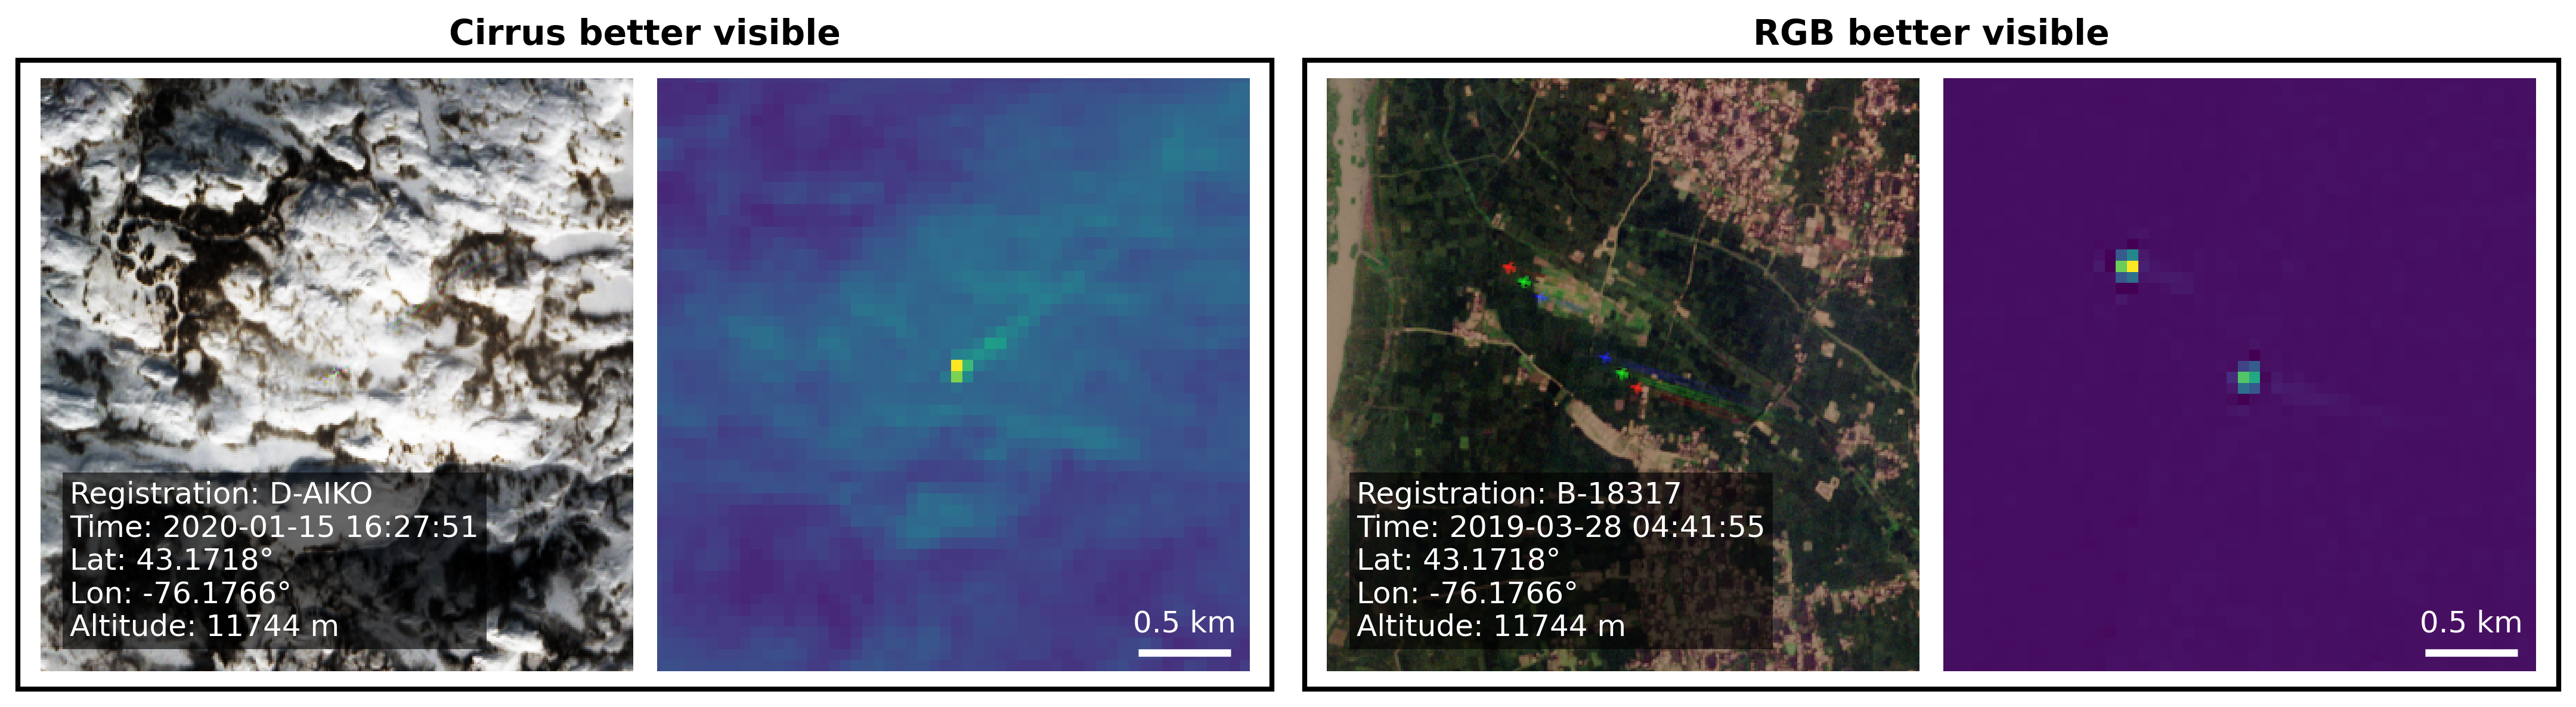

In [5]:
cases = {
    "Cirrus better visible": "intersects_sentinel/2020/2020011509420607_L1C_T18UUG_A014938_20200115T162623",
    "RGB better visible": "intersects_sentinel/2019/2019032723570514_L1C_T46QCM_A010741_20190328T043805",
}

fig = plt.figure(figsize=(18, 5), dpi=300)

# Add a thin spacer column between the two pairs
gs = GridSpec(
    1, 5,
    width_ratios=[1, 1, 0.05, 1, 1],  # <-- spacer is column 2
    wspace=0.05
)

axes = [
    fig.add_subplot(gs[0, 0]),
    fig.add_subplot(gs[0, 1]),
    fig.add_subplot(gs[0, 3]),
    fig.add_subplot(gs[0, 4]),
]


window = 1600  # meters
panel_idx = 0

group_axes = []  # to store pairs for boxing

for group_title, intersect_directory in cases.items():
    with open(f"{DATASET_LOCATION}/{intersect_directory}/metadata.json") as f:
        metadata = json.load(f)

    label = metadata["annotations"]
    x, y = label["x"], label["y"]

    # IAGOS info
    registration = metadata["iagos_data"]["registration"]
    lat = df_row["latitude"]
    lon = df_row["longitude"]
    altitude = df_row["altitude"]
    sensing_time = metadata["satellite_data"]["sensing_time"]

    extent = metadata["satellite_data"]["imagery"]["extent_subset"]

    rgb_img = mpimg.imread(f"{DATASET_LOCATION}/{intersect_directory}/imagery/rgb_subset.png")
    b10_img = mpimg.imread(f"{DATASET_LOCATION}/{intersect_directory}/imagery/b10_subset.png")

    pair = []

    ax_rgb = axes[panel_idx]
    ax_rgb.imshow(rgb_img, extent=extent, origin="upper")
    ax_rgb.axis("off")

    ax_b10 = axes[panel_idx + 1]
    ax_b10.imshow(b10_img, extent=extent, origin="upper", cmap="viridis")
    ax_b10.axis("off")

    for ax in (ax_rgb, ax_b10):
        ax.set_xlim(x - window, x + window)
        ax.set_ylim(y - window, y + window)

        pair.append(ax)

    text = (
        f"Registration: {registration}\n"
        f"Time: {sensing_time[:19]}\n"
        f"Lat: {lat:.4f}°\n"
        f"Lon: {lon:.4f}°\n"
        f"Altitude: {round(altitude)} m"

    )

    ax_rgb.text(
        0.05, 0.05,
        text,
        transform=ax_rgb.transAxes,
        fontsize=12,
        va="bottom",
        ha="left",
        color="white",
        bbox=dict(facecolor="black", alpha=0.6, edgecolor="none", pad=3)
    )

    # Scale bar
    scalebar_length = 500  # meters
    margin = 100  # meters from edge

    bar_x = x + window - scalebar_length - margin
    bar_y = y - window + margin

    # Draw scale bar line
    ax_b10.plot(
        [bar_x, bar_x + scalebar_length],
        [bar_y, bar_y],
        color="white",
        linewidth=3,
        solid_capstyle="butt",
    )

    # Add scale bar label
    ax_b10.text(
        bar_x + scalebar_length / 2,
        bar_y + 80,
        f"{scalebar_length / 1000} km",
        color="white",
        ha="center",
        va="bottom",
        fontsize=12,
        # bbox=dict(facecolor="black", alpha=0.4, edgecolor="none", pad=1.5),
    )

    group_axes.append((group_title, pair))
    panel_idx += 2


# Draw outside boxes and group titles
for title, (ax1, ax2) in group_axes:
    bbox1 = ax1.get_position()
    bbox2 = ax2.get_position()

    x0 = min(bbox1.x0, bbox2.x0)
    y0 = min(bbox1.y0, bbox2.y0)
    x1 = max(bbox1.x1, bbox2.x1)
    y1 = max(bbox1.y1, bbox2.y1)

    rect = patches.Rectangle(
        (x0 - 0.007, y0 - 0.02),
        (x1 - x0) + 0.014,
        (y1 - y0) + 0.04,
        transform=fig.transFigure,
        fill=False,
        linewidth=2,
        edgecolor="black"
    )

    fig.add_artist(rect)

    # Group title
    fig.text(
        (x0 + x1) / 2,
        y1 + 0.03,
        title,
        ha="center",
        va="bottom",
        fontsize=14,
        fontweight="bold"
    )
    
plt.tight_layout()
plt.savefig("figures/figD2.png", dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()


---
## Figure D4

../../data/collocations/intersects_landsat/2014/2014033110114003_LC82080222014090LGN01


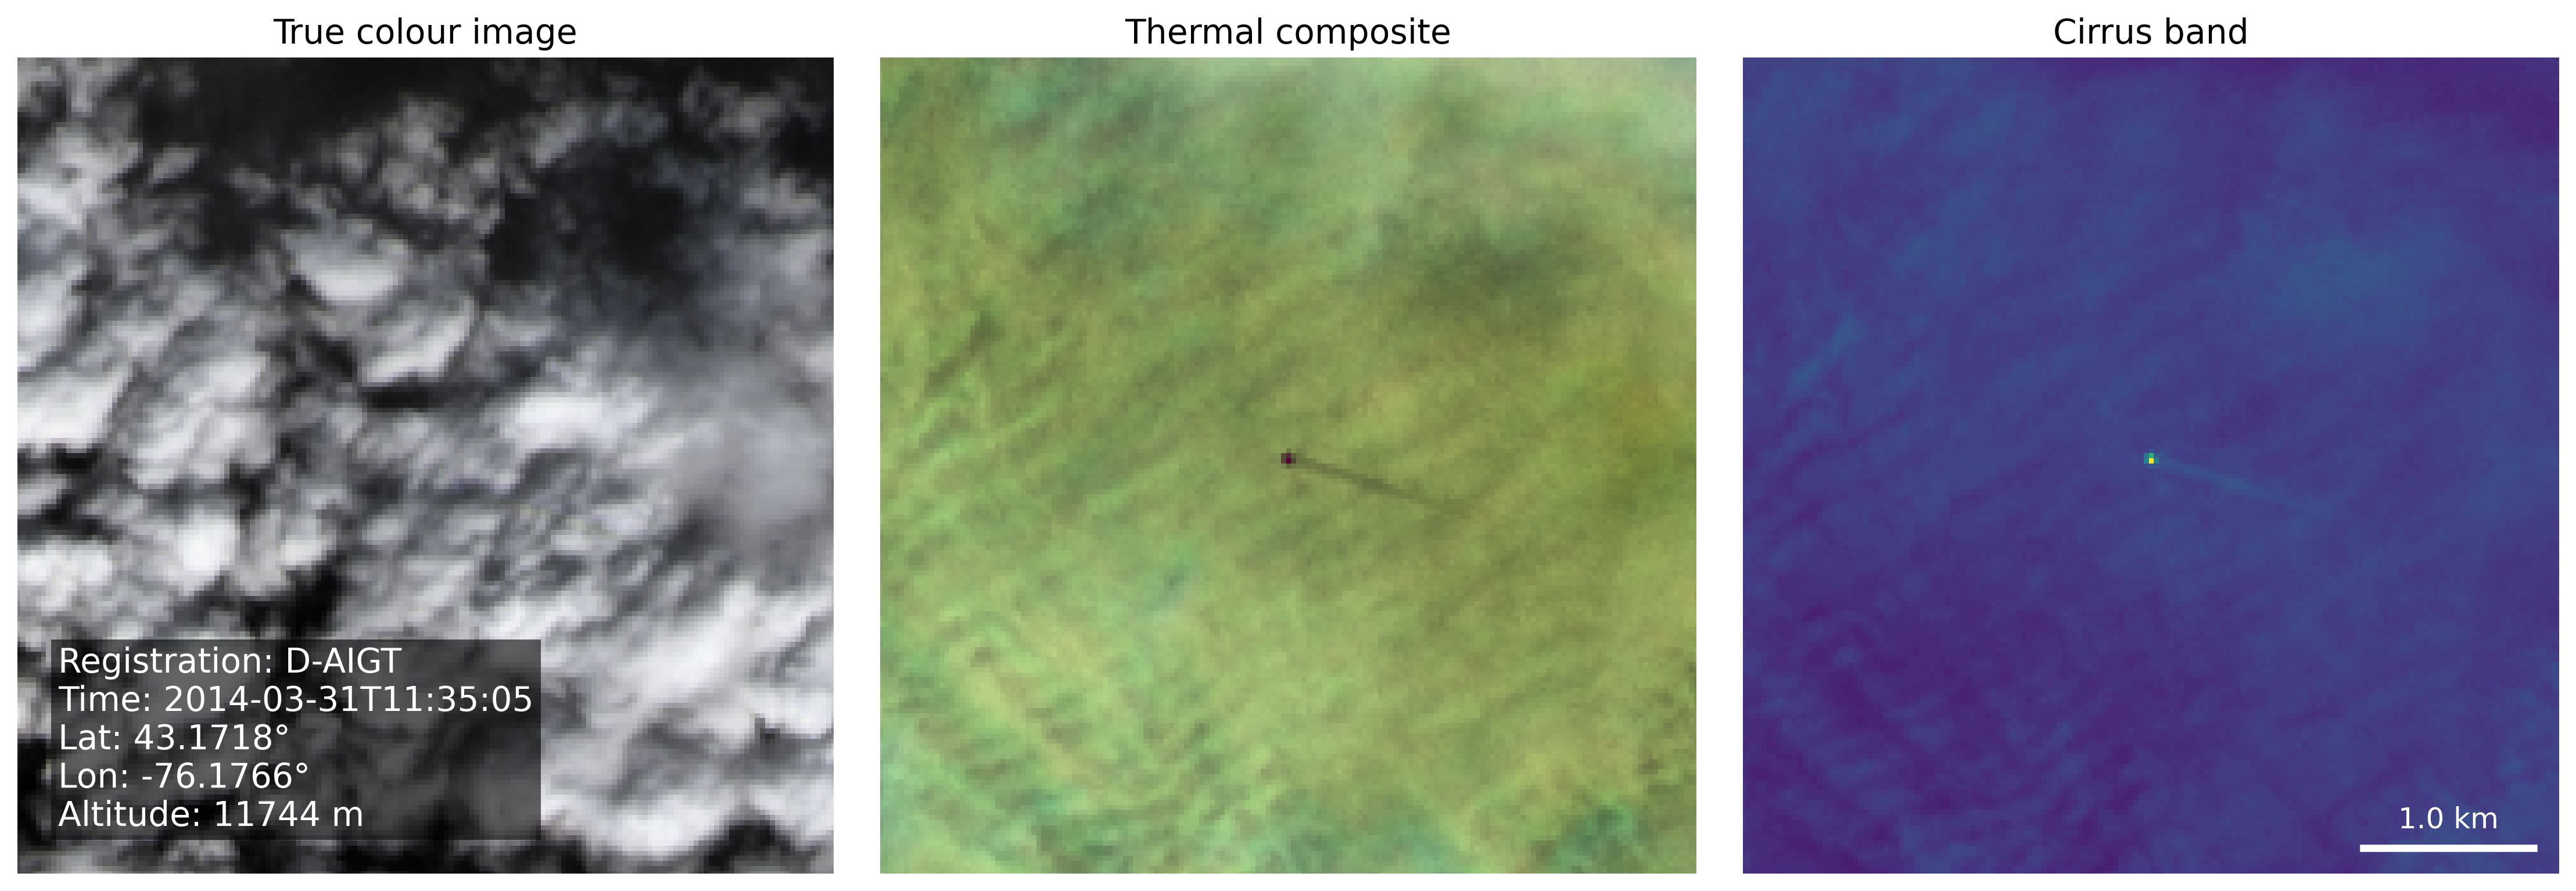

In [6]:
case = "intersects_landsat/2014/2014033110114003_LC82080222014090LGN01"
intersect_directory = f"{DATASET_LOCATION}/{case}"

with open(f"{intersect_directory}/metadata.json", "r") as f:
    metadata = json.load(f)

print(intersect_directory)

fig, (ax_rgb, ax_thermal, ax_b10) = plt.subplots(1, 3, figsize=(15, 5), dpi=300)
names = ["true_color_url", "thermal_url", "cirrus_url"]

x, y = metadata["annotations"]["x"], metadata["annotations"]["y"]

# IAGOS info
registration = metadata["iagos_data"]["registration"]
lat = df_row["latitude"]
lon = df_row["longitude"]
altitude = df_row["altitude"]
sensing_time = metadata["satellite_data"]["sensing_time"]

img_extent = metadata["satellite_data"]["imagery"]["extent"]
zoom_window = 2400

for ax, url in zip((ax_rgb, ax_thermal, ax_b10), names):

    # open the image from URL
    with urllib.request.urlopen(metadata["satellite_data"]["imagery"][url]) as response:
        img = Image.open(response)
        img = np.array(img)

    ax.imshow(img, extent=img_extent)
    ax.set_xlim(x - zoom_window, x + zoom_window)
    ax.set_ylim(y - zoom_window, y + zoom_window) 
    ax.axis('off')  # Hide axes

scalebar_length = 1000  # meters
bar_x = x + zoom_window - scalebar_length - 150   # little margin from right
bar_y = y - zoom_window + 150                  # little margin from bottom

# Draw line
ax_b10.plot(
    [bar_x, bar_x + scalebar_length],
    [bar_y, bar_y],
    color="white", linewidth=3
)

# Add label
ax_b10.text(
    bar_x + scalebar_length / 2,
    bar_y + 250,
    f"{scalebar_length/1000:.1f} km",
    color="white",
    ha="center",
    va="top",
    fontsize=12,
    # backgroundcolor="black"
)

text = (
    f"Registration: {registration}\n"
    f"Time: {sensing_time[:19]}\n"
    f"Lat: {lat:.4f}°\n"
    f"Lon: {lon:.4f}°\n"
    f"Altitude: {round(altitude)} m"

)

ax_rgb.text(
    0.05, 0.05,
    text,
    transform=ax_rgb.transAxes,
    fontsize=14,
    va="bottom",
    ha="left",
    color="white",
    bbox=dict(facecolor="black", alpha=0.6, edgecolor="none", pad=3)
)

ax_rgb.set_title("True colour image", fontsize=14)
ax_thermal.set_title("Thermal composite", fontsize=14)
ax_b10.set_title("Cirrus band", fontsize=14)

plt.tight_layout()
plt.savefig("figures/figD4.png", dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

---
## Figure D3

In [7]:
handlers = []
datasets = []

base_urls = [ "gs://gcp-public-data-sentinel-2/tiles/31/T/FF/S2A_MSIL1C_20180425T103021_N0206_R108_T31TFF_20180425T174016.SAFE"]

granule_ids = ["L1C_T31TFF_A014834_20180425T103643"]
intersect_directory = f"{DATASET_LOCATION}/intersects_sentinel/2018/2018042509223206_L1C_T31TFF_A014834_20180425T103643"

for base_url, granule_id in zip(base_urls, granule_ids):
    handler = sentinel.Sentinel(base_url, granule_id, bands=["B02", "B03", "B04"])
    ds = handler.get()

    rgb, crs, extent = sentinel.extract_sentinel_visualization(ds, color_scheme="true")

    datasets.append(ds)

with open(f"{intersect_directory}/metadata.json") as f:
    metadata = json.load(f)

label = metadata["annotations"]
x_label, y_label = label["x"], label["y"]

# --- IAGOS INFO ---
registration = metadata["iagos_data"]["registration"]
lat = df_row["latitude"]
lon = df_row["longitude"]
altitude = df_row["altitude"]
sensing_time = metadata["satellite_data"]["sensing_time"]

xmin, xmax, ymin, ymax = extent
height, width = rgb.shape[:2]

# UTM → pixel coordinates
x_pix = (x_label - xmin) / (xmax - xmin) * width
y_pix = (ymax - y_label) / (ymax - ymin) * height  # note inversion

rgb_rot = np.rot90(rgb, k=1)

x_pix_rot = y_pix
y_pix_rot = width - x_pix

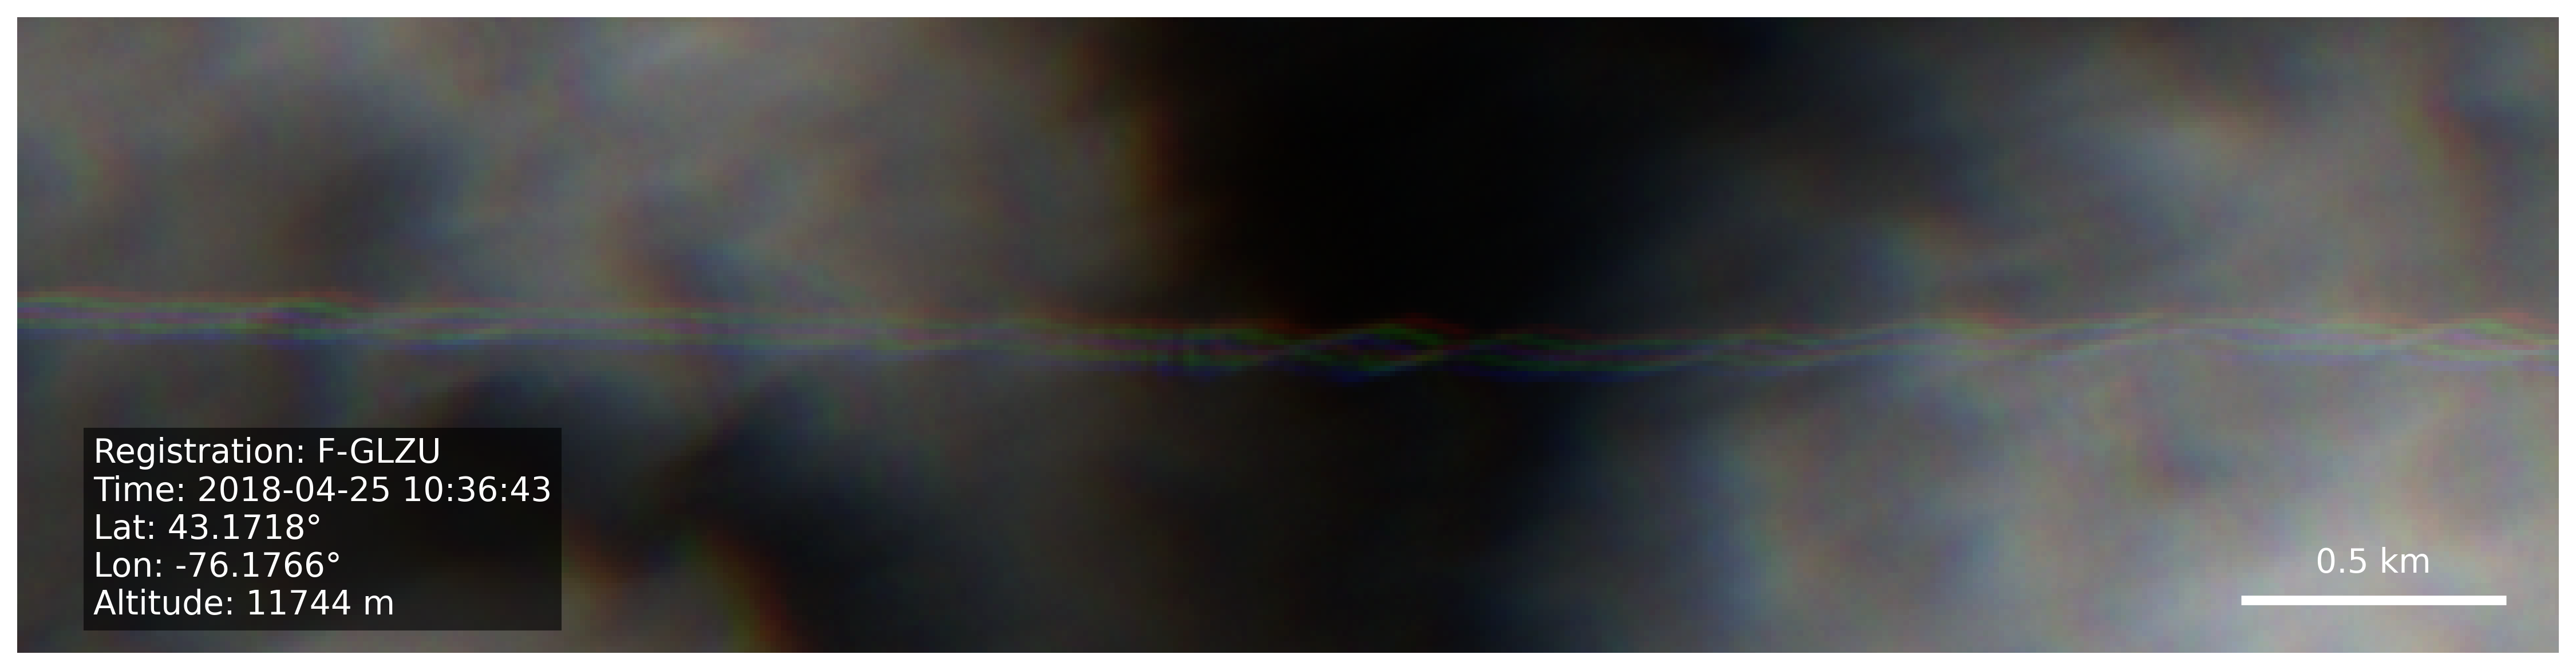

In [8]:
fig, ax = plt.subplots(figsize=(16, 4), dpi=300)

ax.imshow(rgb_rot)

ax.set_xlim(x_pix_rot - 900, x_pix_rot - 1380)
ax.set_ylim(y_pix_rot + 100, y_pix_rot - 20)

# SCALE BAR
meters_per_pixel = 10
scalebar_length_m = 1000                # 1 km
scalebar_length_px = scalebar_length_m / meters_per_pixel

# Place scalebar in lower-right corner (pixel coords)
margin_px = 100
bar_x = x_pix_rot - 1330 + 10
bar_y = y_pix_rot + 90

# Draw scalebar
ax.plot(
    [bar_x, bar_x - 50],
    [bar_y, bar_y],
    color="white",
    linewidth=4,
    solid_capstyle="butt"
)

# Scalebar label
ax.text(
    bar_x - 25,
    bar_y - 10,
    "0.5 km",
    color="white",
    ha="center",
    va="top",
    fontsize=14,
)

text = (
    f"Registration: {registration}\n"
    f"Time: {sensing_time[:19]}\n"
    f"Lat: {lat:.4f}°\n"
    f"Lon: {lon:.4f}°\n"
    f"Altitude: {round(altitude)} m"
)

ax.text(
    0.03, 0.05,
    text,
    transform=ax.transAxes,
    fontsize=14,
    va="bottom",
    ha="left",
    color="white",
    bbox=dict(facecolor="black", alpha=0.6, edgecolor="none", pad=4)
)
ax.axis("off")

plt.tight_layout()
plt.savefig("figures/figD3.png", dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()